In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix , confusion_matrix
import numpy as np
import seaborn as sns

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train , num_classes=10)
y_test_cat = to_categorical(y_test , num_classes=10)

# 2. Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 digits
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, 
                    epochs=5, 
                    batch_size=32, 
                    validation_split=0.1)

test_loss , test_accuracy = model.evaluate(X_test , y_test_cat , verbose = 0 )
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred , axis = 1)

print("Classification Report : ")
print(classification_report(y_test , y_pred_labels))

plt.figure(figsize=(10,4))
for i in range(10) : 
    plt.subplot(2, 5 , i+1)
    plt.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.title(f"Pred: {y_pred_labels[i]} | True: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report , confusion_matrix 

import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [3]:
# load the dataset 
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

In [4]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# One hot encode labels 
y_train_cat = to_categorical(y_train , num_classes=10)
y_test_cat = to_categorical(y_test , num_classes=10)



In [6]:
# Build the CNN Model 
model = Sequential([
    Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64 , kernel_size=(3,3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128 , activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
])

c:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Compile the model 
model.compile(optimizer='adam' , 
              loss='categorical_crossentropy' , 
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train , y_train_cat , 
                    epochs = 5 , 
                    batch_size=32 , 
                    validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8794 - loss: 0.3782 - val_accuracy: 0.9862 - val_loss: 0.0471
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9807 - loss: 0.0607 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9858 - loss: 0.0463 - val_accuracy: 0.9912 - val_loss: 0.0317
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9902 - loss: 0.0327 - val_accuracy: 0.9913 - val_loss: 0.0319
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9923 - loss: 0.0257 - val_accuracy: 0.9913 - val_loss: 0.0354


In [9]:
# Evaluate the model 
test_loss , test_accuracy = model.evaluate(X_test , y_test_cat , verbose=0)
print(f"Test Accuracy : {test_accuracy*100:.2f}%")

Test Accuracy : 99.11%


In [10]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred , axis=1)

print("Classification Report : ")
print(classification_report(y_test , y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



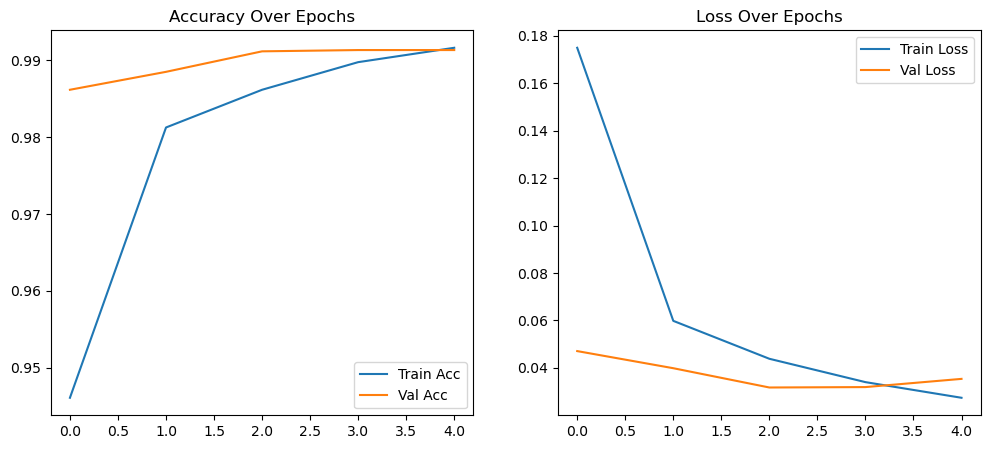

In [11]:
# 8. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()

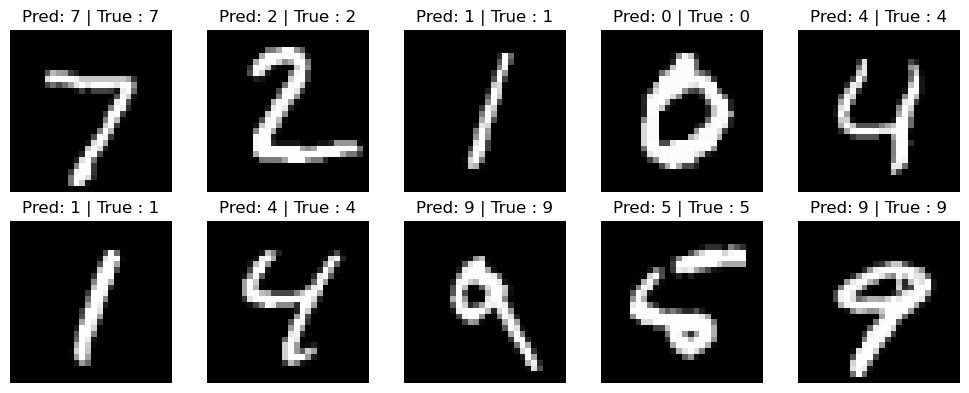

In [12]:
# Show some predictions 
plt.figure(figsize=(10,4))
for i in range(10) : 
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28) , cmap='gray')
    plt.title(f"Pred: {y_pred_labels[i]} | True : {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

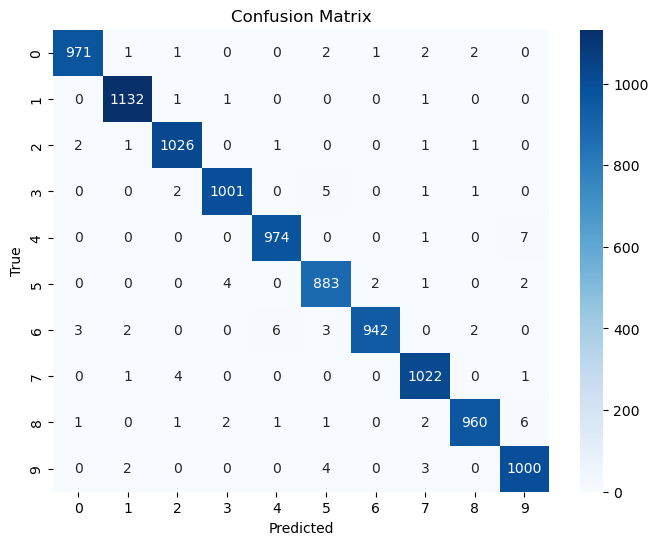

In [13]:
# Plot Confusion Matrix 
cm = confusion_matrix(y_test , y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues',xticklabels=range(10) , yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()